In [24]:
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os
import plotly.express as px

In [2]:
# test_data = ListDataset(
#     [{'start':'2013-01-01' , 'target':total[:1574]['meantemp']}],
#     freq = '1d'
# )

# 2013-01-01 ~2016-12-31 meantmp -> 114 2017-04-24 meantmp forecasting

In [3]:
os.getcwd()
df_train = pd.read_csv('C:\\Users\\baesm\\Desktop\\notebookfile/DailyDelhiClimateTrain.csv')
df_test =  pd.read_csv('C:\\Users\\baesm\\Desktop\\notebookfile/DailyDelhiClimateTest.csv')

In [6]:
df_train = df_train.drop([1461])

In [7]:
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [5]:
df_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [54]:
len(df_test)

114

In [8]:
df_train["date"] = pd.to_datetime(df_train["date"])

In [11]:
df_test['date'] = pd.to_datetime(df_test['date'])

In [19]:
dataset = pd.concat([df_train,df_test])
dataset = dataset.reset_index(drop=True)

# 1461까지 training, [:1461] , test : [1461:]

In [51]:
dataset[:1461]

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [48]:
dataset.iloc[0][0] , dataset.iloc[-1][0]

start = dataset.iloc[0][0]

In [115]:
dataset

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1570,2017-04-20,34.500000,27.500000,5.562500,998.625000
1571,2017-04-21,34.250000,39.375000,6.962500,999.875000
1572,2017-04-22,32.900000,40.900000,8.890000,1001.600000
1573,2017-04-23,32.875000,27.500000,9.962500,1002.125000


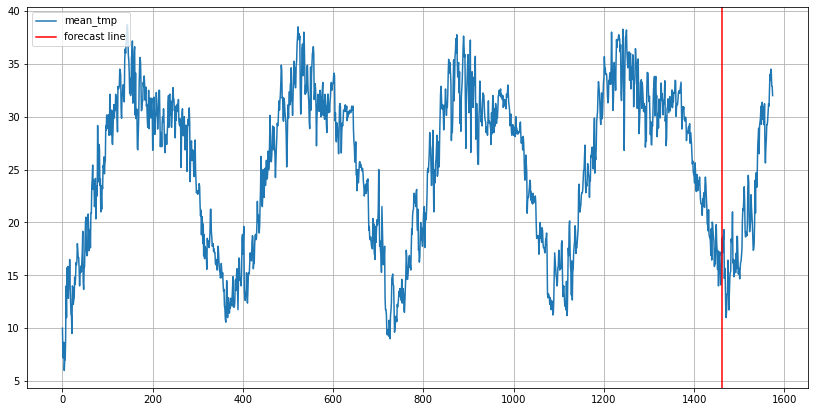

In [46]:
plt.figure(figsize=(14,7))
plt.plot(dataset['meantemp'],label='mean_tmp')
plt.axvline(len(df_train),color='r',label='forecast line')
plt.grid(which='both')
plt.legend(loc='upper left')

In [45]:
fig = px.line(dataset, x="date", y="meantemp", title="Mean temperature")
fig.add_vrect(x0=dataset.iloc[1461][0],x1=dataset.iloc[1461][0])
fig.show()

# Preprocessing ListDataset

In [53]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{'start':start , 'target':dataset[:1461]['meantemp'] }],
    freq='1d'
)
test_data = ListDataset(
    [{'start':start , 'target':dataset['meantemp']}],
    freq='1d'
)

# Modeling

In [158]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

estimator = DeepAREstimator(
    freq='1d',
    prediction_length = 114,
    trainer = Trainer(
        epochs=30,
        learning_rate=1e-3,
        num_batches_per_epoch=256
    ),
    context_length=100
)
predictor = estimator.train(training_data=training_data)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:43<00:00,  5.86it/s, epoch=30/30, avg_epoch_loss=1.06]


# Evaluation

In [159]:
from gluonts.evaluation import make_evaluation_predictions

forecast_it,ts_it =make_evaluation_predictions(
    dataset = test_data,
    predictor=predictor,
    num_samples=50
)

forecasts = list(forecast_it)
tss = list(ts_it)

In [150]:
forecasts[0].samples.shape

(50, 114)

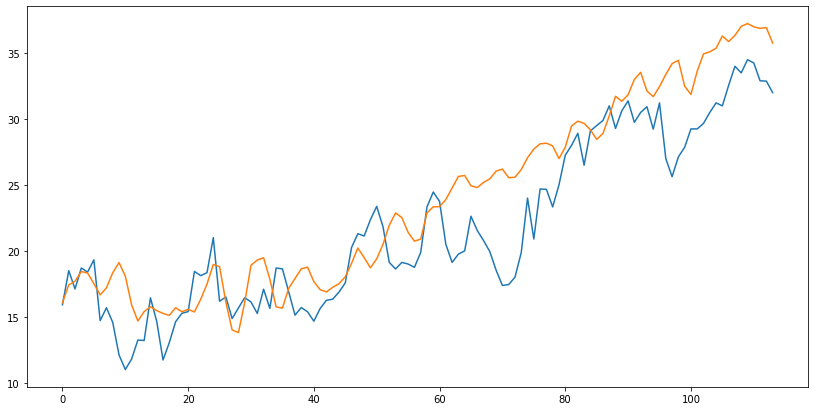

In [160]:
plt.figure(figsize=(14,7))
plt.plot(tss[0].values.reshape(-1,)[1461:])
plt.plot(forecasts[0].median[:len(df_test)])
path='C:\\Users\\baesm\\Desktop\\notebookfile/delhimodelresult'
plt.savefig(path+'/model_epoch39_batch_256')

In [161]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 10
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [162]:

from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_data))

Running evaluation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 249.90it/s]


In [163]:
agg_metrics

{'MSE': 12.40063262404057,
 'abs_error': 321.3558349609375,
 'abs_target_sum': 2475.291015625,
 'abs_target_mean': 21.713079084429825,
 'seasonal_error': 1.2366545376712328,
 'MASE': 2.279465078662165,
 'MAPE': 0.14034504639474968,
 'sMAPE': 0.127457108413964,
 'MSIS': 57.90239447919471,
 'QuantileLoss[0.1]': 408.1562593460083,
 'Coverage[0.1]': 0.6578947368421053,
 'QuantileLoss[0.5]': 321.3558406829834,
 'Coverage[0.5]': 0.7631578947368421,
 'QuantileLoss[0.9]': 100.28958721160889,
 'Coverage[0.9]': 0.8596491228070176,
 'RMSE': 3.5214531977637544,
 'NRMSE': 0.16218119890186114,
 'ND': 0.12982547625003057,
 'wQuantileLoss[0.1]': 0.1648922315677499,
 'wQuantileLoss[0.5]': 0.1298254785616965,
 'wQuantileLoss[0.9]': 0.040516281349765336,
 'mean_absolute_QuantileLoss': 276.6005624135335,
 'mean_wQuantileLoss': 0.1117446638264039,
 'MAE_Coverage': 0.28713450292397663,
 'OWA': nan}

In [164]:
y_true = tss[0].values.reshape(-1,)[1461:]
y_pred = forecasts[0].mean[:114]

In [165]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

mape_tuned = mean_absolute_percentage_error(y_true, y_pred)
mse = mean_squared_error(y_true,y_pred)

In [166]:
mse,mape_tuned

(12.400633, 0.14050405)